In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

(select id_timeline) 별 is_converted 비율: 100.00%, 전체 갯수: 1, is_converted된 갯수: 1
09-02-2022 requested for boq of requirement 별 is_converted 비율: 100.00%, 전체 갯수: 1, is_converted된 갯수: 1
14:00~15:00 별 is_converted 비율: 0.00%, 전체 갯수: 1, is_converted된 갯수: 0
14th aug- aggressive price required as he has got price from outside delhi 별 is_converted 비율: 100.00%, 전체 갯수: 1, is_converted된 갯수: 1
14th-feb-2022 shared details.awaiting update from customer. 별 is_converted 비율: 0.00%, 전체 갯수: 1, is_converted된 갯수: 0
25-nov-2021  no mobile number, sent a mail to customer 별 is_converted 비율: 0.00%, 전체 갯수: 1, is_converted된 갯수: 0
29thsep2021:-no such requirement as of now 별 is_converted 비율: 100.00%, 전체 갯수: 1, is_converted된 갯수: 1
3 months 별 is_converted 비율: 100.00%, 전체 갯수: 1, is_converted된 갯수: 1
3 months ~ 6 months 별 is_converted 비율: 7.62%, 전체 갯수: 5026, is_converted된 갯수: 383
3_months_~_6_months 별 is_converted 비율: 0.00%, 전체 갯수: 9, is_converted된 갯수: 0
4/8 months 별 is_converted 비율: 0.00%, 전체 갯수: 1, is_converted된 갯수: 0

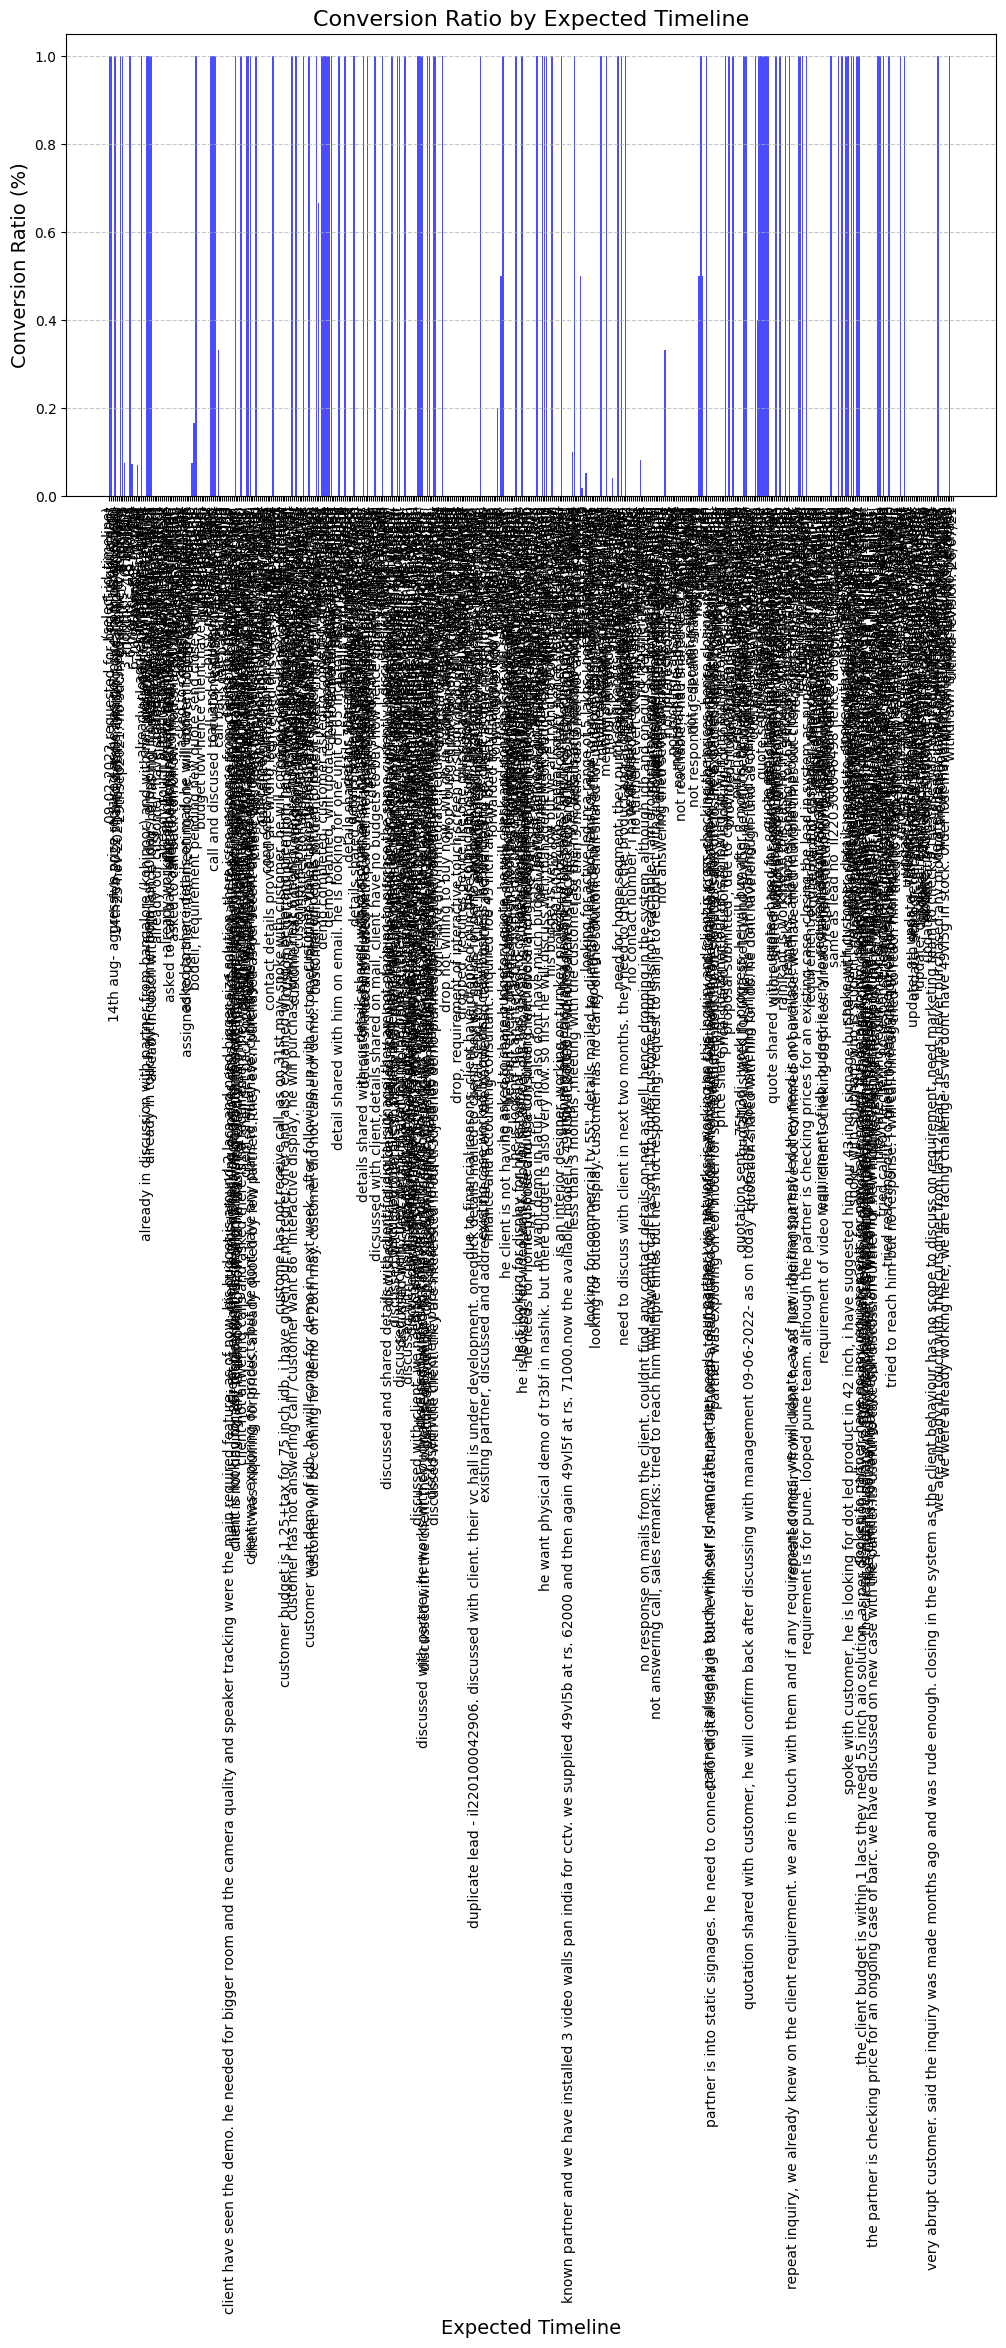

In [43]:
df_expected_timeline = df.dropna(subset=['expected_timeline'])

converted_counts_expected_timeline = df_expected_timeline.groupby('expected_timeline')['is_converted'].sum().reset_index()
total_counts_expected_timeline = df_expected_timeline.groupby('expected_timeline')['is_converted'].count().reset_index()

ratio_df_expected_timeline = pd.merge(converted_counts_expected_timeline, total_counts_expected_timeline, on='expected_timeline', how='left')
ratio_df_expected_timeline['conversion_ratio'] = ratio_df_expected_timeline['is_converted_x'] / ratio_df_expected_timeline['is_converted_y']

# Print information
for index, row in ratio_df_expected_timeline.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['expected_timeline']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(ratio_df_expected_timeline['expected_timeline'], ratio_df_expected_timeline['conversion_ratio'], color='blue', alpha=0.7)
plt.title('Conversion Ratio by Expected Timeline', fontsize=16)
plt.xlabel('Expected Timeline', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [46]:
df['expected_timeline_category'] = df['expected_timeline'].apply(lambda x: str(x).split()[0].lower())

df_expected_timeline_category = df.dropna(subset=['expected_timeline_category'])

converted_counts_expected_timeline_category = df_expected_timeline_category.groupby('expected_timeline_category')['is_converted'].sum().reset_index()
total_counts_expected_timeline_category = df_expected_timeline_category.groupby('expected_timeline_category')['is_converted'].count().reset_index()

ratio_df_expected_timeline_category = pd.merge(converted_counts_expected_timeline_category, total_counts_expected_timeline_category, on='expected_timeline_category', how='left')
ratio_df_expected_timeline_category['conversion_ratio'] = ratio_df_expected_timeline_category['is_converted_x'] / ratio_df_expected_timeline_category['is_converted_y']

sorted_expected_timeline_category = ratio_df_expected_timeline_category.sort_values(by='is_converted_y', ascending=False)

for index, row in sorted_expected_timeline_category.head(10).iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['expected_timeline_category']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

nan 별 is_converted 비율: 7.45%, 전체 갯수: 30863, is_converted된 갯수: 2298
less 별 is_converted 비율: 10.10%, 전체 갯수: 17365, is_converted된 갯수: 1754
3 별 is_converted 비율: 7.64%, 전체 갯수: 5027, is_converted된 갯수: 384
more 별 is_converted 비율: 4.10%, 전체 갯수: 3025, is_converted된 갯수: 124
9 별 is_converted 비율: 7.17%, 전체 갯수: 1102, is_converted된 갯수: 79
6 별 is_converted 비율: 7.38%, 전체 갯수: 1098, is_converted된 갯수: 81
etc. 별 is_converted 비율: 0.00%, 전체 갯수: 95, is_converted된 갯수: 0
being 별 is_converted 비율: 10.00%, 전체 갯수: 90, is_converted된 갯수: 9
less_than_3_months 별 is_converted 비율: 5.26%, 전체 갯수: 76, is_converted된 갯수: 4
not 별 is_converted 비율: 2.63%, 전체 갯수: 38, is_converted된 갯수: 1


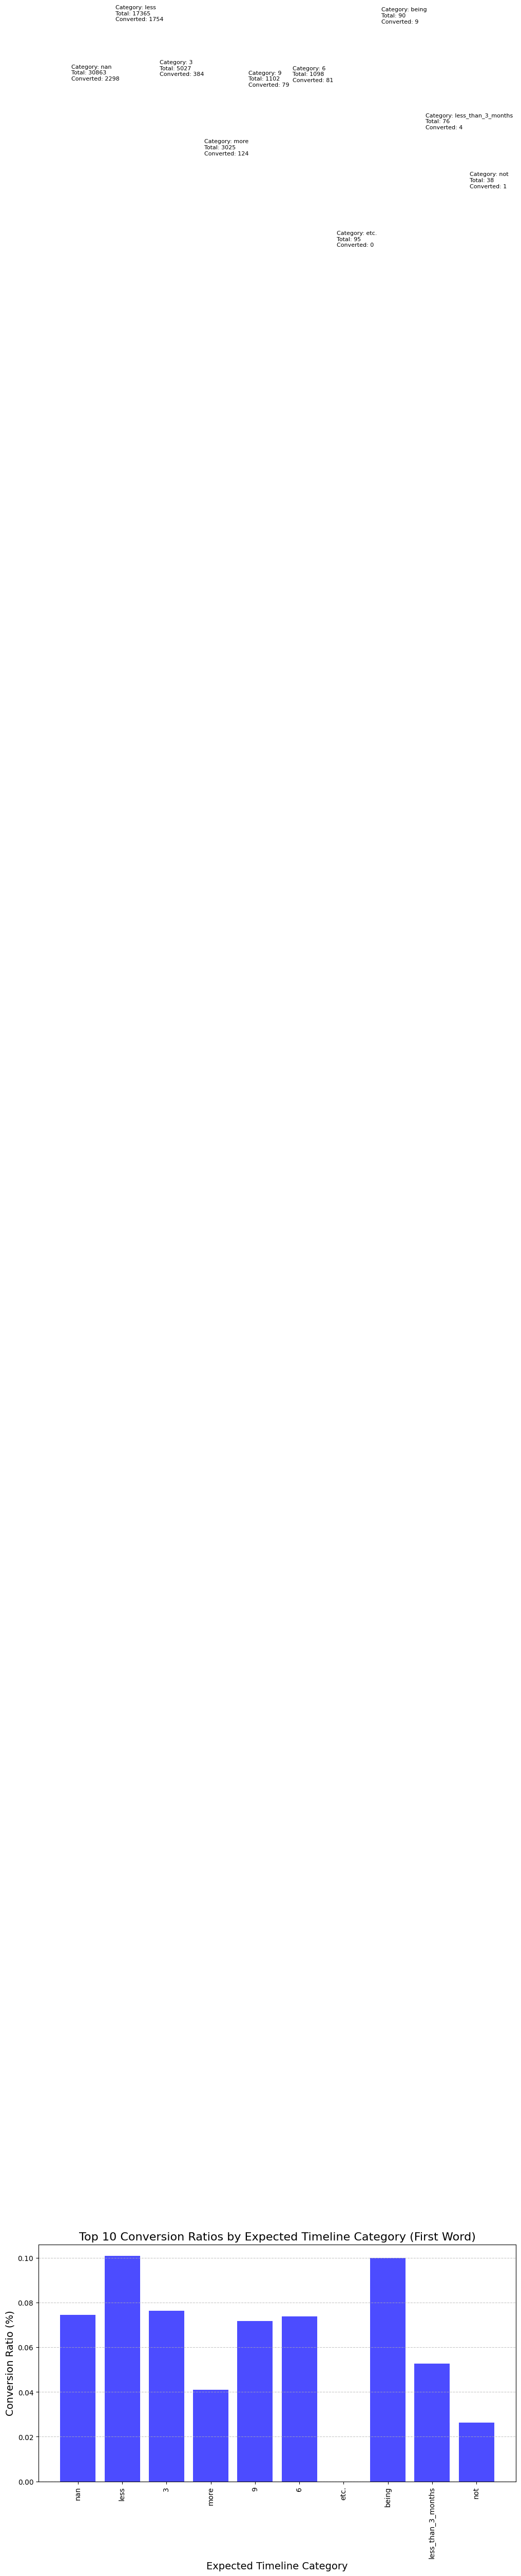

In [48]:
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_expected_timeline_category.head(10)['expected_timeline_category'], sorted_expected_timeline_category.head(10)['conversion_ratio'], color='blue', alpha=0.7)

for bar, total, converted, category in zip(bars, sorted_expected_timeline_category.head(10)['is_converted_y'], sorted_expected_timeline_category.head(10)['is_converted_x'], sorted_expected_timeline_category.head(10)['expected_timeline_category']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'Category: {category}\nTotal: {total}\nConverted: {converted}', fontsize=8, color='black')

plt.title('Top 10 Conversion Ratios by Expected Timeline Category (First Word)', fontsize=16)
plt.xlabel('Expected Timeline Category', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
